### Library import

In [19]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

### Data Load

In [20]:
csv_path = "/home/miserver10/workspace_vscode/datasets/data/*.csv"

csv_files = glob.glob(csv_path)

df_list = [pd.read_csv(csv_file) for csv_file in csv_files]
df = pd.concat(df_list, ignore_index=True)  #ignore_index = 기존 인덱스 무시하여 새로운 인덱스 생성(연속으로 이어진다)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412669 entries, 0 to 412668
Data columns (total 54 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Front_Seat_LH_Temp Unit: Degree ('c)     412669 non-null  float64
 1   Front_Seat_RH_Temp Unit: Degree('c)      412669 non-null  float64
 2   Rear_Seat_CT_Temp Unit: Degree('c)       412669 non-null  float64
 3   Front_Roof_CT_Temp Unit: Degree('c)      412669 non-null  float64
 4   Front_Roof_LH_Temp Unit: Degree('c)      412669 non-null  float64
 5   Front_Roof_RH_Temp Unit: Degree('c)      412669 non-null  float64
 6   Rear_Roof_LH_Temp Unit: Degree('c)       412669 non-null  float64
 7   Rear_Roof_RH_Temp Unit: Degree('c)       412669 non-null  float64
 8   DRV_LH_Vent_Wind_Velocity Unit: m / s    412669 non-null  float64
 9   DRV_RH_Vent_Wind_Velocity Unit: m / s    412669 non-null  float64
 10  DRV_Foot_Vent_Wind_Velocity Unit

### Data EDA

##### 1. rename

In [21]:
df.rename(columns={ 'DRV_LH_Vent_Wind_Velocity Unit: m / s' : '운전석 좌측 방향', 'DRV_RH_Vent_Wind_Velocity Unit: m / s' : '운전석 우측 방향',
                    'DRV_Foot_Vent_Wind_Velocity Unit: m / s' : '운전석 발 방향', 'DRV_Seat_Vent_Wind_Velocity Unit: m / s' : '운전석 좌석 방향',
                    'PAS_LH_Vent_Wind_Velocity Unit: m / s' : '조수석 좌측 방향', 'PAS_RH_Vent_Wind_Velocity Unit: m / s' : '조수석 우측 방향',
                    'PAS_Foot_Vent_Wind_Velocity Unit: m / s' : '조수석 발 방향', 'PAS_Seat_Vent_Wind_Velocity Unit: m / s' : '조수석 좌석 방향', 
                    'CR_Datc_IncarSnsTemp_C': '내부 온도', "Front_Seat_LH_Temp Unit: Degree ('c)" : '운전석 온도', 
                    "Front_Seat_RH_Temp Unit: Degree('c)" : '보조석 온도', 'CR_Datc_Humidity' : '습도',
                    "Rear_Seat_CT_Temp Unit: Degree('c)" : '뒷자석 온도(중앙)', "Front_Roof_CT_Temp Unit: Degree('c)" : '앞 루프 중앙',
                    "Front_Roof_LH_Temp Unit: Degree('c)": '앞 루프 좌측', "Front_Roof_RH_Temp Unit: Degree('c)" : '앞 루프 우측',
                    "Rear_Roof_LH_Temp Unit: Degree('c)": '뒷 루프 좌측', "Rear_Roof_RH_Temp Unit: Degree('c)": '뒷 루프 우측'}, inplace=True)

##### 2. column drop

In [22]:
drop_list = ["5V_ADC_CH1 Unit: V",
       "5V_ADC_CH2 Unit: V", "5V_ADC_CH3 Unit: V", "5V_ADC_CH4 Unit: V",
       "5V_ADC_CH5 Unit: V", "PWM_CH8 Unit: PWM", "Frequency_CH8 Unit: Hz",
       "CR_Datc_DrModeAct","CR_Datc_TempAct", "CR_Datc_IntakeAct", "CR_Datc_AdsAct",
       "CR_Datc_DrVentTemp_C", "CR_Datc_DrFloorTemp_C", 
       "CR_Datc_ClimatePowSum_W", "LAT_ACCEL_m/s^2", "LONG_ACCEL_m/s^2",
       "YAW_RATE_'/s", "WHL_SPD_FL_km/h", "WHL_SPD_FR_km/h", "WHL_SPD_RL_km/h",
       "WHL_SPD_RR_km/h", 'CR_Datc_AcnCompSpdFB_rpm', 'CR_Datc_AptVal_PSI', 'CR_Datc_OutTemp_C', 
       'CR_Datc_OutTempC' ,'CR_Datc_EvapSnsTemp_C', 'CR_Datc_DrTempDispC', 'DATC_ModeDisp', 
       'CR_Datc_AcnCompPwrCon_W', 'CR_Datc_OutTempSnr_C', 'CR_Datc_PTCPwrCon_W', 'CF_Datc_Heatpump_Mode',
       'CR_Datc_SetTemp_C', 'DATC_BlowerLevel', 'CR_Datc_PhotoSnsFB_V', 'CR_Mcu_VehSpd_Kph_sum']

df = df.drop(drop_list, axis=1)

##### 3. describe

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
운전석 온도,412669.0,21.784187,3.555606,1.9,19.70,21.90,24.10,32.10
보조석 온도,412669.0,21.561661,3.592976,3.3,19.50,21.60,23.90,32.30
뒷자석 온도(중앙),412669.0,20.707921,3.207202,4.0,18.80,20.80,22.80,30.80
앞 루프 중앙,412669.0,25.131863,4.631474,6.7,22.20,24.40,27.10,48.20
앞 루프 좌측,412669.0,25.634501,4.709038,7.9,22.60,25.00,27.80,48.60
앞 루프 우측,412669.0,24.929038,4.987489,7.5,21.90,24.20,26.90,48.50
뒷 루프 좌측,412669.0,24.642151,4.872564,6.5,21.60,23.80,26.90,47.60
뒷 루프 우측,412669.0,24.627537,4.459770,7.0,21.90,24.10,26.70,44.00
운전석 좌측 방향,412669.0,1.778558,1.110704,0.0,0.78,1.73,2.49,6.35
운전석 우측 방향,412669.0,1.229494,1.058564,0.0,0.14,1.22,1.93,7.54


##### 온도의 분포와, 운전석 우측 방향 토출구 풍속 히스토그램 확인

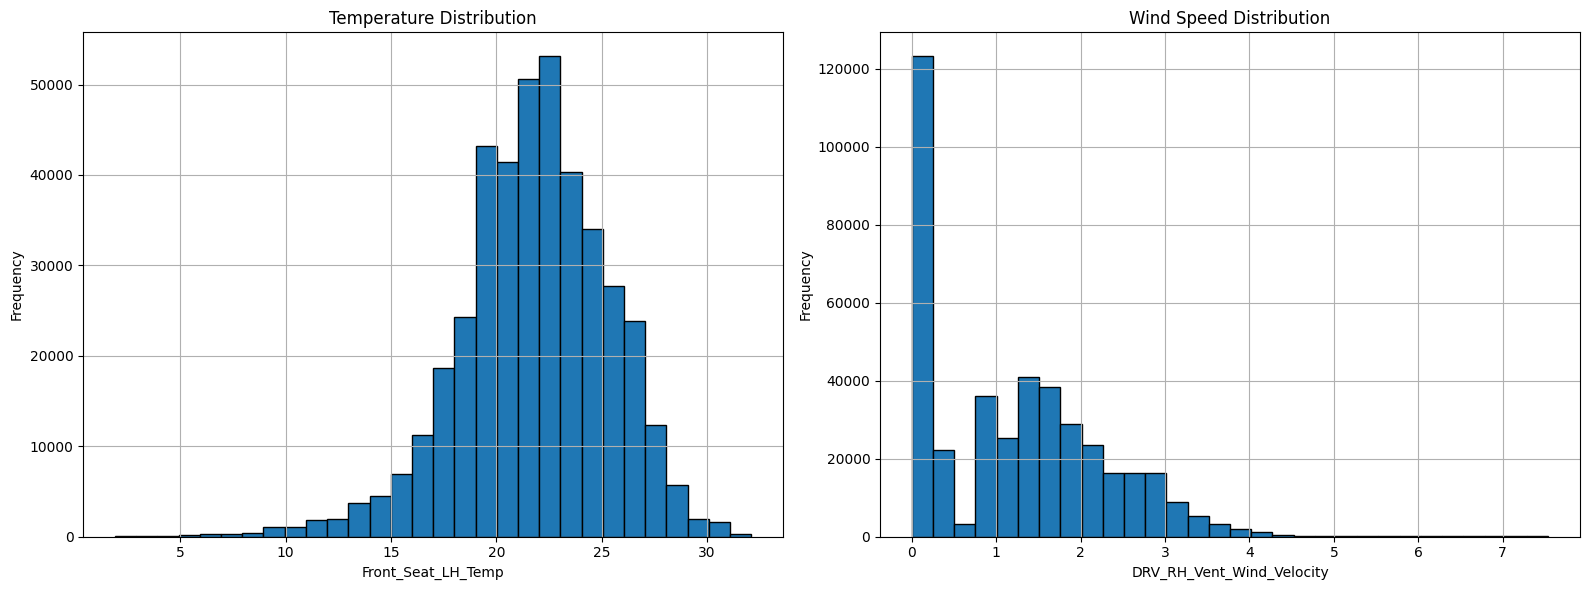

In [24]:
# 히스토그램을 행렬처럼 동시에 표시
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 첫 번째 히스토그램
axes[0].hist(df['운전석 온도'], bins=30, edgecolor='k')
axes[0].set_xlabel('Front_Seat_LH_Temp')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Temperature Distribution')
axes[0].grid(True)

# 두 번째 히스토그램
axes[1].hist(df['운전석 우측 방향'], bins=30, edgecolor='k')
axes[1].set_xlabel('DRV_RH_Vent_Wind_Velocity')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Wind Speed Distribution')
axes[1].grid(True)

# 레이아웃 조정
plt.tight_layout()
plt.show()

### 체감온도 측정을 위한 새로운 data frame 생성

In [25]:
df_summer = df[df['운전석 온도'] > 10][['운전석 온도', '습도']]
df_winter = df[df['운전석 온도'] <= 10][['운전석 온도', '운전석 우측 방향']]
df_winter = df_winter[df_winter['운전석 우측 방향'] >= 1.3]

df_summer['RH'] = df_summer['습도'] / 100.0
df_winter['V(km/h)'] = df_winter['운전석 우측 방향'] * 3.6

In [26]:
df_winter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1050 entries, 255421 to 377031
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   운전석 온도     1050 non-null   float64
 1   운전석 우측 방향  1050 non-null   float64
 2   V(km/h)    1050 non-null   float64
dtypes: float64(3)
memory usage: 32.8 KB


In [27]:
df_winter.describe().T

,count,mean,std,min,25%,50%,75%,max
운전석 온도,1050.0,9.191333,0.924175,4.90,9.20,9.4,9.7000,10.000
운전석 우측 방향,1050.0,1.584124,0.267440,1.30,1.40,1.5,1.6575,2.520
V(km/h),1050.0,5.702846,0.962783,4.68,5.04,5.4,5.9670,9.072


In [28]:
df_summer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 410132 entries, 0 to 412668
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   운전석 온도  410132 non-null  float64
 1   습도      410132 non-null  float64
 2   RH      410132 non-null  float64
dtypes: float64(3)
memory usage: 12.5 MB


In [29]:
df_summer.describe().T

,count,mean,std,min,25%,50%,75%,max
운전석 온도,410132.0,21.870418,3.389052,10.1,19.800,22.0,24.200,32.1
습도,410132.0,41.588085,15.286520,0.0,30.500,40.0,51.500,90.0
RH,410132.0,0.415881,0.152865,0.0,0.305,0.4,0.515,0.9


##### 계절별 체감온도 함수 구현

In [30]:
# 습구온도 계산 함수
def calculate_wet_bulb_temperature(Ta, RH):
    return (Ta * math.atan(0.151977 * (RH + 8.313659)**0.5) + 
            math.atan(Ta + RH) - 
            math.atan(RH - 1.67633) + 
            0.00391838 * RH**1.5 * math.atan(0.023101 * RH) - 
            4.686035)

# 여름 체감온도 계산 함수
def calculate_summer_heat_index(Ta, RH):
    Tw = calculate_wet_bulb_temperature(Ta, RH)
    HI = (-0.2442 + 0.55399 * Tw + 0.45535 * Ta - 0.0022 * Tw**2 + 0.00278 * Tw * Ta + 3.0)
    return HI

# 겨울 체감온도 계산 함수
def calculate_winter_wci(Ta, V):
    WCI = 13.12 + 0.6215 * Ta - 11.37 * V**0.16 + 0.3965 * V**0.16 * Ta
    return WCI

In [31]:
df_summer['체감온도'] = df_summer.apply(lambda row: calculate_summer_heat_index(row['운전석 온도'], row['습도']), axis=1)
df_winter['체감온도'] = df_winter.apply(lambda row: calculate_winter_wci(row['운전석 온도'], row['운전석 우측 방향']), axis=1)

In [32]:
df_summer.describe().T

,count,mean,std,min,25%,50%,75%,max
운전석 온도,410132.0,21.870418,3.389052,10.10000,19.800000,22.00000,24.200000,32.100000
습도,410132.0,41.588085,15.286520,0.00000,30.500000,40.00000,51.500000,90.000000
RH,410132.0,0.415881,0.152865,0.00000,0.305000,0.40000,0.515000,0.900000
체감온도,410132.0,20.824510,3.264964,9.11077,18.663631,20.99005,22.961423,31.745826


In [33]:
df_winter.describe().T

,count,mean,std,min,25%,50%,75%,max
운전석 온도,1050.0,9.191333,0.924175,4.900000,9.200000,9.40000,9.700000,10.00000
운전석 우측 방향,1050.0,1.584124,0.267440,1.300000,1.400000,1.50000,1.657500,2.52000
V(km/h),1050.0,5.702846,0.962783,4.680000,5.040000,5.40000,5.967000,9.07200
체감온도,1050.0,10.530208,0.998930,6.251195,10.464303,10.75509,11.154951,11.60306


### 체감온도 범주화

- -20 : cold
- 20-23 : cool
- 23-24 : normal
- 24-26 : warm
- 26- : hot

In [34]:
bins = [0, 20, 23, 24, 26, float('inf')]
labels = ['cold', 'cool', 'normal', 'warm', 'hot']
df_summer['체감온도_범주'] = pd.cut(df_summer['체감온도'], bins=bins, labels=labels)
df_winter['체감온도_범주'] = pd.cut(df_winter['체감온도'], bins=bins, labels=labels)

In [35]:
df_winter

,운전석 온도,운전석 우측 방향,V(km/h),체감온도,체감온도_범주
255421,5.4,1.43,5.148,6.703644,cold
255422,5.1,1.32,4.752,6.517198,cold
255423,4.9,1.37,4.932,6.251195,cold
255427,5.5,1.34,4.824,6.908460,cold
255428,5.3,1.34,4.824,6.701058,cold
...,...,...,...,...,...
377021,9.5,1.32,4.752,11.075642,cold
377023,9.5,1.30,4.680,11.095035,cold
377027,9.6,1.38,4.968,11.122804,cold
377028,9.8,1.45,5.220,11.267965,cold


In [41]:
df_winter.describe().T

,count,mean,std,min,25%,50%,75%,max
운전석 온도,1050.0,9.191333,0.924175,4.900000,9.200000,9.40000,9.700000,10.00000
운전석 우측 방향,1050.0,1.584124,0.267440,1.300000,1.400000,1.50000,1.657500,2.52000
V(km/h),1050.0,5.702846,0.962783,4.680000,5.040000,5.40000,5.967000,9.07200
체감온도,1050.0,10.530208,0.998930,6.251195,10.464303,10.75509,11.154951,11.60306


In [36]:
df_summer

,운전석 온도,습도,RH,체감온도,체감온도_범주
0,26.9,30.0,0.30,24.517221,warm
1,26.7,30.0,0.30,24.332959,warm
2,26.7,30.0,0.30,24.332959,warm
3,26.8,30.0,0.30,24.425082,warm
4,26.8,30.0,0.30,24.425082,warm
...,...,...,...,...,...
412664,25.0,35.0,0.35,23.284262,normal
412665,24.9,35.0,0.35,23.190794,normal
412666,24.8,35.0,0.35,23.097342,normal
412667,25.0,35.0,0.35,23.284262,normal


### 체감온도별 데이터 샘플 시각화

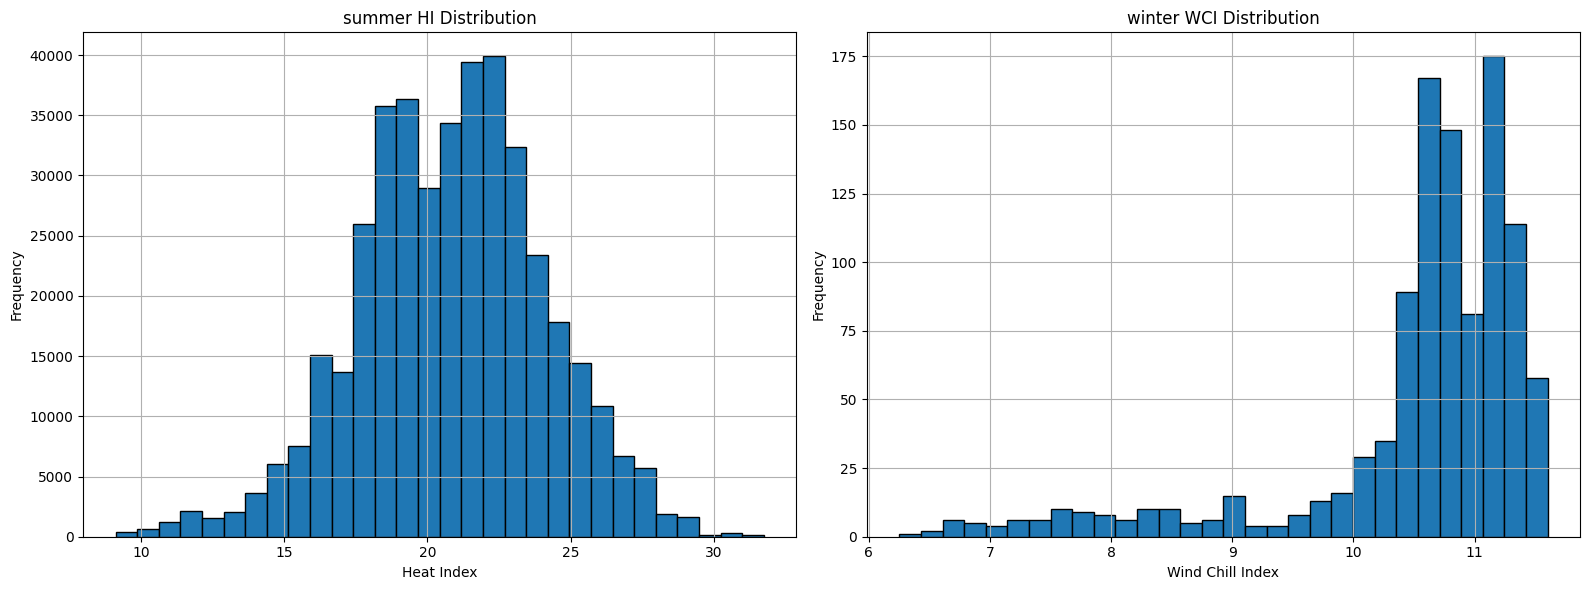

In [37]:
# 히스토그램을 행렬처럼 동시에 표시
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 첫 번째 히스토그램
axes[0].hist(df_summer['체감온도'], bins=30, edgecolor='k')
axes[0].set_xlabel('Heat Index')
axes[0].set_ylabel('Frequency')
axes[0].set_title('summer HI Distribution')
axes[0].grid(True)

# 두 번째 히스토그램
axes[1].hist(df_winter['체감온도'], bins=30, edgecolor='k')
axes[1].set_xlabel('Wind Chill Index')
axes[1].set_ylabel('Frequency')
axes[1].set_title('winter WCI Distribution')
axes[1].grid(True)

# 레이아웃 조정
plt.tight_layout()
plt.show()

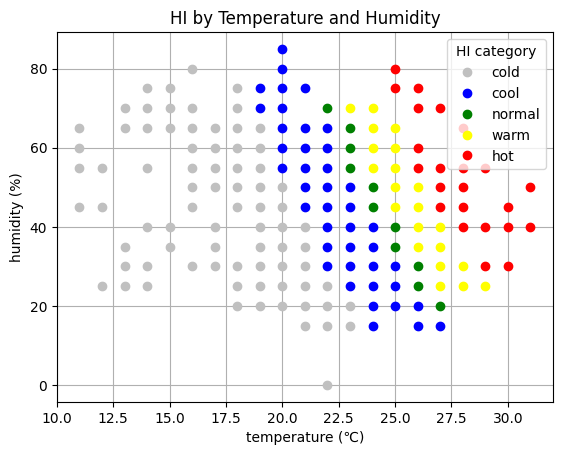

In [38]:
temperature = df_summer['운전석 온도']
humidity = df_summer['습도']

# temperature 열은 온도계 계측 8개 열 중 1개 사용/ 8개 열 : '운전석 온도', '보조석 온도', '뒷자석 온도(중앙)', '앞 루프 중앙', '앞 루프 좌측', '앞 루프 우측', '뒷 루프 좌측', '뒷 루프 우측'

temperature_points = range(int(temperature.min()), int(temperature.max()) + 1, 1)
humidity_points = range(int(humidity.min()), int(humidity.max()) + 1, 5)


# 불쾌지수 범주에 따른 색상 매핑
color_map = {'cold' : 'silver', 'cool': 'blue', 'normal': 'green', 'warm': 'yellow', 'hot': 'red'}

# 그래프 설정
fig, ax = plt.subplots()
ax.set_xlabel('temperature (℃)')
ax.set_ylabel('humidity (%)')
ax.set_title('HI by Temperature and Humidity')
# 열지수 : Heat Index, HI

# 각 온도와 습도 조합에 대해 점을 찍음
for temp in temperature_points:
    for hum in humidity_points:
        # 해당 온도와 습도에 가장 가까운 데이터 포인트 찾기
        subset = df_summer[(df_summer['운전석 온도'] == temp) & (df_summer['습도'] == hum)]
        
        if not subset.empty:
            category = subset['체감온도_범주'].values[0]
            color = color_map[category]
            ax.plot(temp, hum, 'o', color=color)  # 점의 색상 설정

for category, color in color_map.items():
    ax.plot([], [], 'o', color=color, label=category)

ax.legend(title='HI category')

plt.grid(True)
plt.show()

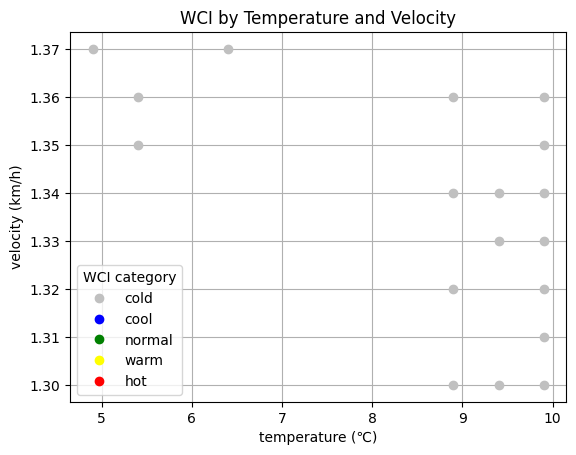

In [59]:
temperature = df_winter['운전석 온도']
velocity = df_winter['운전석 우측 방향']

# temperature 열은 온도계 계측 8개 열 중 1개 사용/ 8개 열 : '운전석 온도', '보조석 온도', '뒷자석 온도(중앙)', '앞 루프 중앙', '앞 루프 좌측', '앞 루프 우측', '뒷 루프 좌측', '뒷 루프 우측'

temperature_points = np.arange(temperature.min(), temperature.max() + 0.1, 0.5)
velocity_points = np.arange(velocity.min(), velocity.max(), 0.01)


# 불쾌지수 범주에 따른 색상 매핑
color_map = {'cold' : 'silver', 'cool': 'blue', 'normal': 'green', 'warm': 'yellow', 'hot': 'red'}

# 그래프 설정
fig, ax = plt.subplots()
ax.set_xlabel('temperature (℃)')
ax.set_ylabel('velocity (km/h)')
ax.set_title('WCI by Temperature and Velocity')
# 바람 냉각 지수: Wind Chill Index, WCI

# 각 온도와 속도 조합에 대해 점을 찍음
for temp in temperature_points:
    for vel in velocity_points:
        # 해당 온도와 습도에 가장 가까운 데이터 포인트 찾기
        subset = df_winter[(df_winter['운전석 온도'] == temp) & (df_winter['운전석 우측 방향'] == vel)]
        
        if not subset.empty:
            category = subset['체감온도_범주'].values[0]
            color = color_map[category]
            ax.plot(temp, vel, 'o', color=color)  # 점의 색상 설정

for category, color in color_map.items():
    ax.plot([], [], 'o', color=color, label=category)

ax.legend(title='WCI category')

plt.grid(True)
plt.show()